# Terminating Terrorism

Ben Besthof

DAV 5400

11/28/2023

Hamas declared war on Israel on October 7th, 2023, with a deadly invasion capturing over 200 civilian hostages and killing 40 of them within the next days. The main question that arises as a result is: how didn’t Israel thwart the invasion with all of its security? In reality Israel has more enemies than the (Western) world thinks. Not only are the Israel Defense Forces (IDF) fighting Hamas, but they are also keeping out Hezbollah, and Islamic Jihad away from Israel’s civilians. The IDF carries out operations to neutralize casualties often due to the constant threat on the Jewish State. The question that researchers should be asking is: Can the Israeli Defense Forces draw useful insight from executed targets data to improve national security? 

The Abu Ali Express Forum on telegram posted three different PDF files with a list of executed terrorists. Each PDF was uploaded on different months. Only users with access to the forum can access it, therefore I uploaded the PDFs to the repository. 

Originally the data was contained in tables within the PDFs. All of the information was transferred to Excel and saved in CSV format. The information was limited, therefore, project time was devoted to cleaning and engineering the following features manually on Microsoft Excel: 

# Name

The name of the casualty, which uniquely identifies an instance within this dataset. 

# Date
 
The date attribute is the calendar day in which the casualty was neutralized. The value of this attribute is realized when visualizing statistics over a period of time. An example can be tracking terrorist casualties on a monthly basis. Possible time series trends may appear, but that is not likely due to the circumstances by which the casualty is killed.

# Age

Age of the casualty at the time of their death. This attribute gives some insight to who the terrorist organizations are wanting to recruit. For example, it can be assumed that younger recruits have been in demand if the average age of the casualties is lower for a specific organization. 

# Where 

Where attribute is the precise location where the casualty was neutralized. The precise location might be too specific; therefore, an additional location feature needs to be derived.

# Region 

Region is the general location in which the casualty was neutralized and is derived from the ‘where’ attribute. Neighborhoods and towns are converted to cities and regions respectively. The purpose of using this attribute is to have a location attribute with lower cardinality.

# Affiliation

The affiliation attribute notes the terrorist organization to which the casualty was part of. This gives insight to who is threatening Israel’s national security. The represented terrorist organizations in the dataset are Hamas, Fatah, PFLP (popular front for liberation of Palestine), PIJ (Palestinian Islamic Jihad), Unaffiliated, Unknown, Al Mujahadeen, and al-Aqsa's Martyrs Brigades, Multiple. Note that values unknown and unaffiliated are not the same. An affiliation value of unknown means that the casualty was affiliated, but to which organization the casualty was affiliated to was not clear at the time of death. He unaffiliated value means that not a single terrorist organization or report can confirm the casualty’s association. 

# Role

Role is the casualty’s position in their organization. This gives insight into what the casualties’ responsibilities were and how significant their contributions to the organization are. The values for this attribute can also display who the IDF is able to neutralize more successfully, additionally it can exhibit who the IDF is focused on targeting. 

# Incrimination

The values in this attribute describe the means by which the IDF was able to confirm the casualty’s association with organized terror. The most common incrimination are official announcements, martyrdom posters, and pictures of the casualty with a rifle from when they were alive. 

# Circumstances

This field is a description of how or why the terrorist became a casualty.

# Method 

The manner by which the IDF was able to neutralize the terrorist. This attribute is derived from the circumstance attribute. The values for this feature are either: Fire, Injury, Airstrike, and Failed PL Attack. A value of fire means that the casualty was killed in an exchange of fire with IDF forces. A value of airstrike means that the casualty was killed by an aerial missile. A value of injury means the terrorist died from sustained injuries. The value ‘failed PL attack’ means that the casualty was neutralized via detonation of terrorist organization explosive.

# Offenses 

Is a derived field from circumstances and incrimination. The value returned is the number of punishable actions the terrorist has committed. It is assumed that any casualty with an offenses value of 3 has committed 3 or more acts of terrorism. 

# Terrorist 

The terrorist attribute is the target variable created for this dataset. 1 = confirmed terrorist organization affiliation, 0 = civilian casualty. 


 terrorismp1.csv dataset is a null count check across all attributes including the target. There should not be any null values in numeric fields like age because it is crucial for the analysis of this dataset. Age, for example, provides insight to who the terrorist organizations are recruiting. There are only six null values out of eighty-three instances.  However, these null values are kept because a civilian casualty unaffiliated with any terror organization does not have an applicable role.  

Working with this dataset requires a basic high level analysis of features. Pandas has the .isnull()function, which checks if an attribute has null values and then it can be tallied up per attribute with the .sum() function. 


In [4]:
#Using pandas to read dataset
from Introp1 import intro 
solution = intro('terrorismp1.csv')

In [7]:
#checking dataset size
solution.shape()

(83, 12)

In [9]:
#reviewing metadata and null count before exploratory EDA
solution.nullstypes()

(name             object
 age               int64
 date             object
 where            object
 region           object
 affiliation      object
 role             object
 incrimination    object
 circumstances    object
 method           object
 offenses          int64
 terrorist         int64
 dtype: object,
 name             0
 age              0
 date             0
 where            0
 region           0
 affiliation      0
 role             6
 incrimination    9
 circumstances    0
 method           0
 offenses         0
 terrorist        0
 dtype: int64)

In [10]:
#desccriptive analysis of numerical variables 
solution.numdesc()

,count,mean,std,min,25%,50%,75%,max
age,83.0,27.060241,13.362077,4.0,18.0,23.0,33.5,62.0
offenses,83.0,1.421687,0.989216,0.0,1.0,1.0,2.0,3.0


Exploratory Data Analysis

In [11]:
#import Exploratory Data Analysis Package
from EDABB import EDA
solution = EDA('terrorismp1.csv')


/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


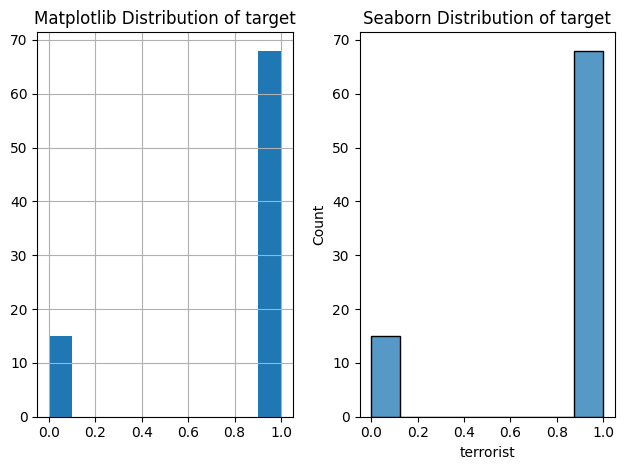

In [12]:
#displaying distribution of target variable 
solution.histotarget()

In [16]:
#counting the total casualties by terrorist organizations
solution.astable()

,affiliation,casualties
0,Al-Mujahideen Brigades,2
1,Hamas,1
2,PFLP,5
3,PIJ,13
4,Unaffiliated,11


/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


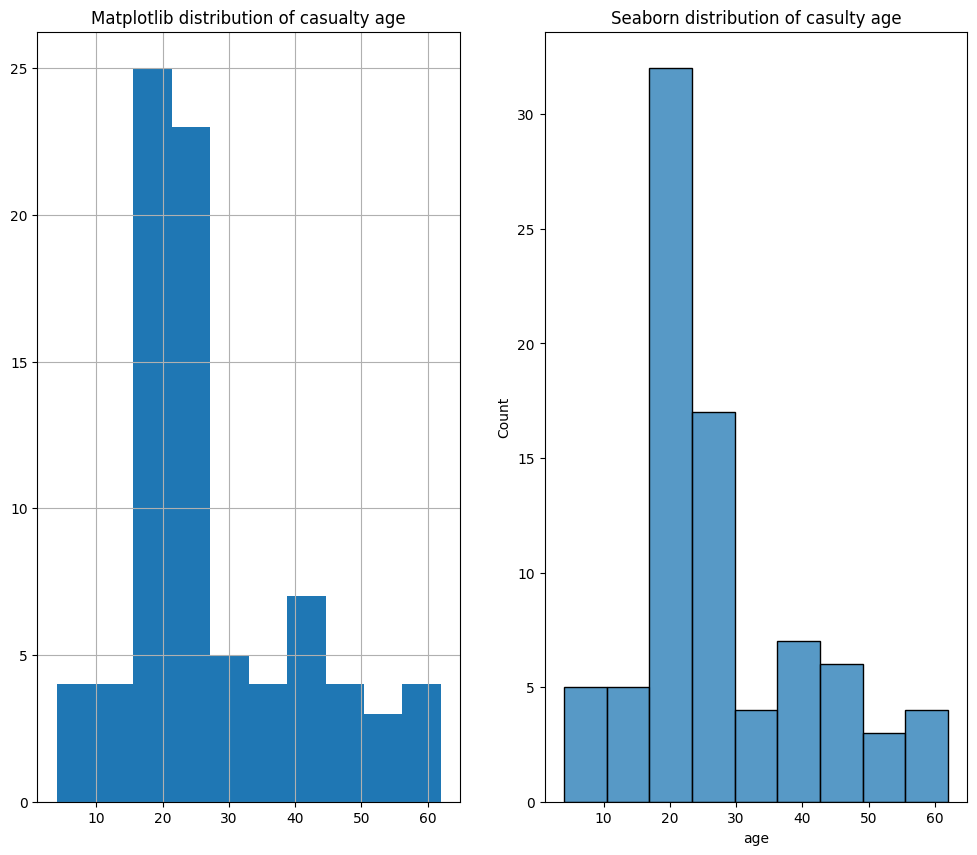

In [13]:
#displaying distribution of ages in the dataset
solution.histoage()

/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


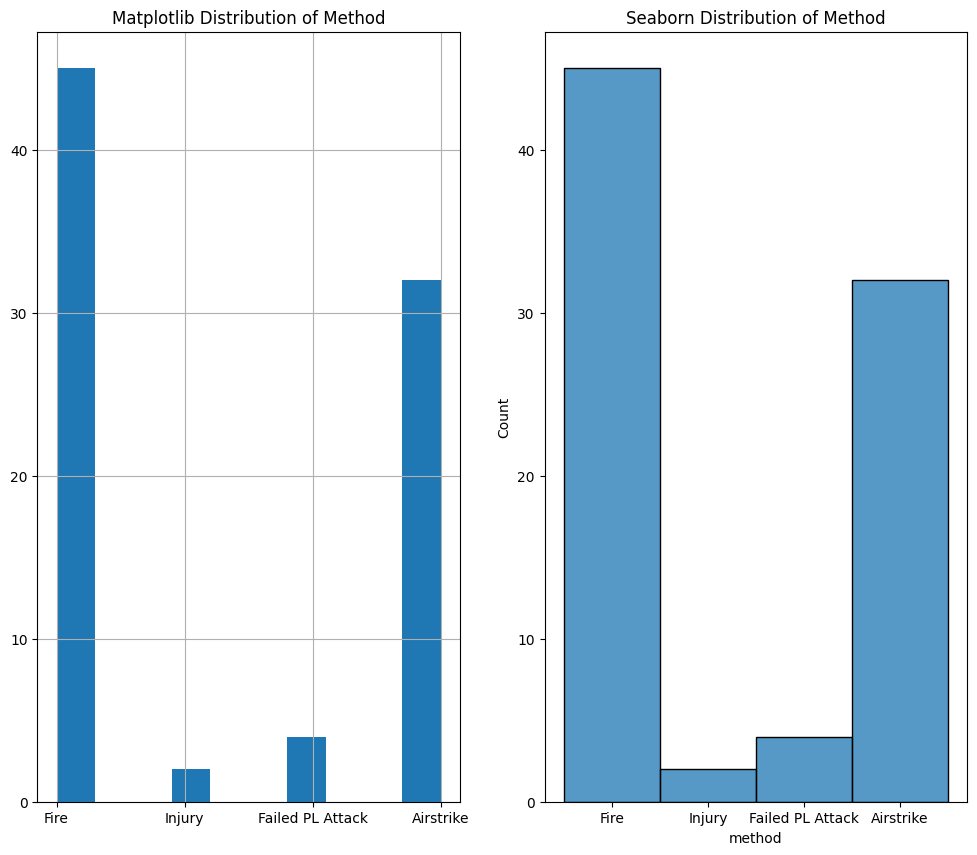

In [14]:
#displaying the distribution of methods used to neutralize target
solution.histomethods()

/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


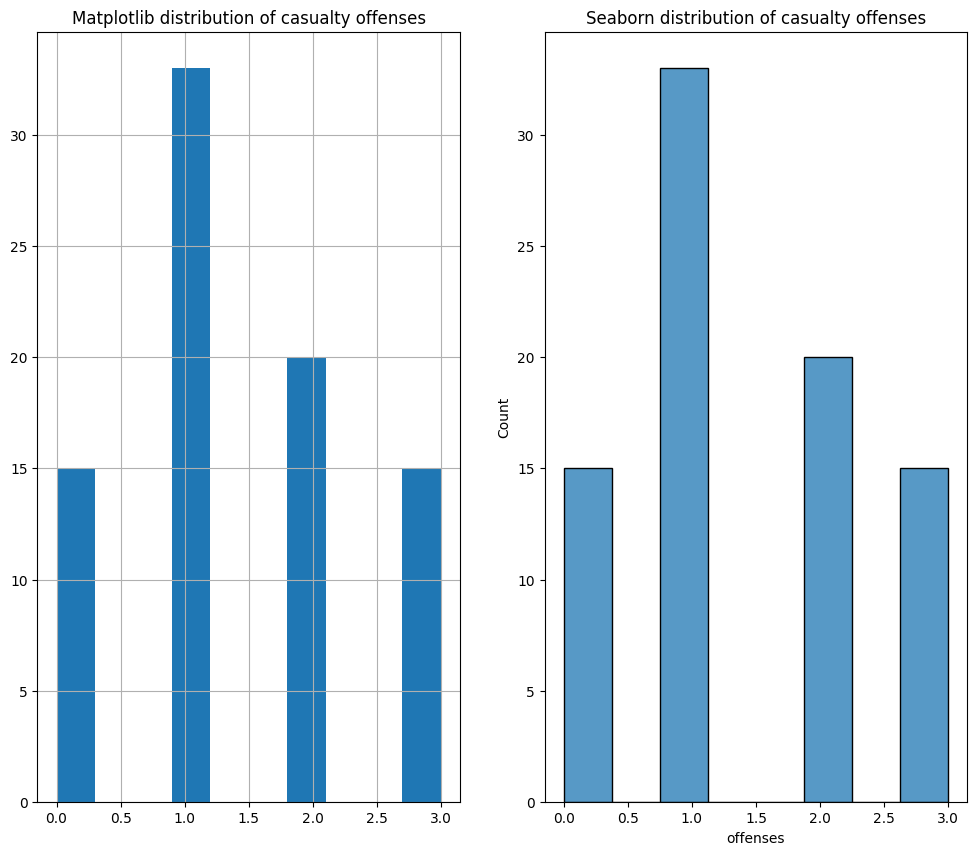

In [17]:
#displaying distribution of offenses comitted by casualty before death
solution.offensehisto()

/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


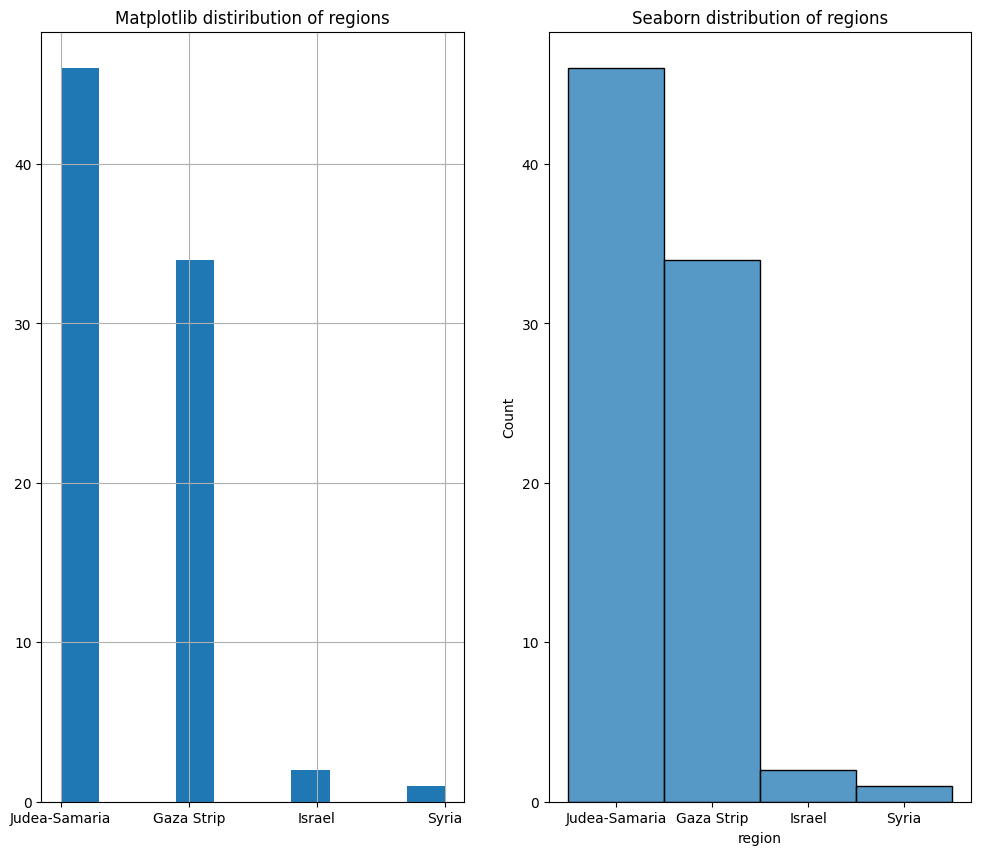

In [19]:
#displaying the distribution of casualties by region
solution.historegion()

Inferences and Insights 

In [20]:
#reading dataset 
from INFP1 import INF
solution = INF('terrorismp1.csv')

In [21]:
#calculating the number of casualties per role, average offenses for each role, average age within given role
solution.rolestable()

,role,rolecount,offensesavg,avage
0,Commander,3,3.000000,45.333333
1,Militant,53,1.679245,24.415094
2,Military Engineer,1,1.000000,17.000000
3,Officer,1,3.000000,51.000000
4,Operative,3,1.666667,30.000000
5,Secretary,1,1.000000,62.000000
6,Senior official,2,3.000000,50.500000
7,Terrorist associate,3,1.000000,21.333333


In [22]:
#counting total offenses per organization and average age within each organization
solution.orgcount()

,affiliation,totaloffenses,avage
0,Al-Mujahideen Brigades,2,27.500000
1,Fatah,2,21.500000
2,Hamas,4,21.250000
3,Multiple,1,22.000000
4,PFLP,8,24.625000
5,PIJ,32,28.718750
6,Unaffiliated,4,25.250000
7,Unknown,9,29.333333
8,al-Aqsa's Martyrs Brigades,6,23.666667


/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


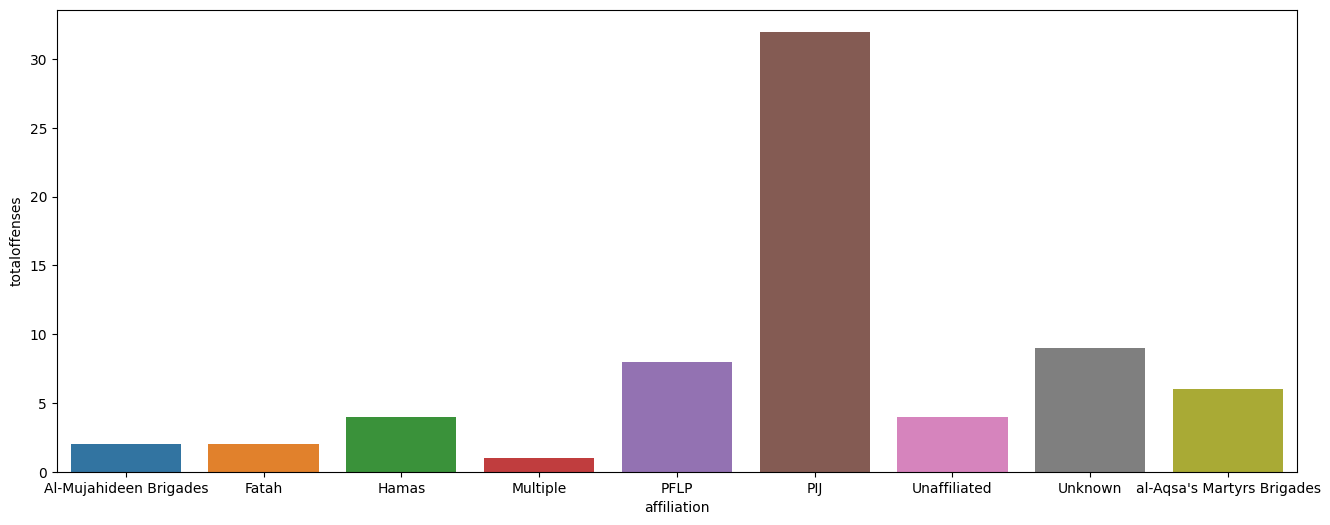

In [23]:
#seaborn bar chart displaying total offenses per organization
solution.snsbar()

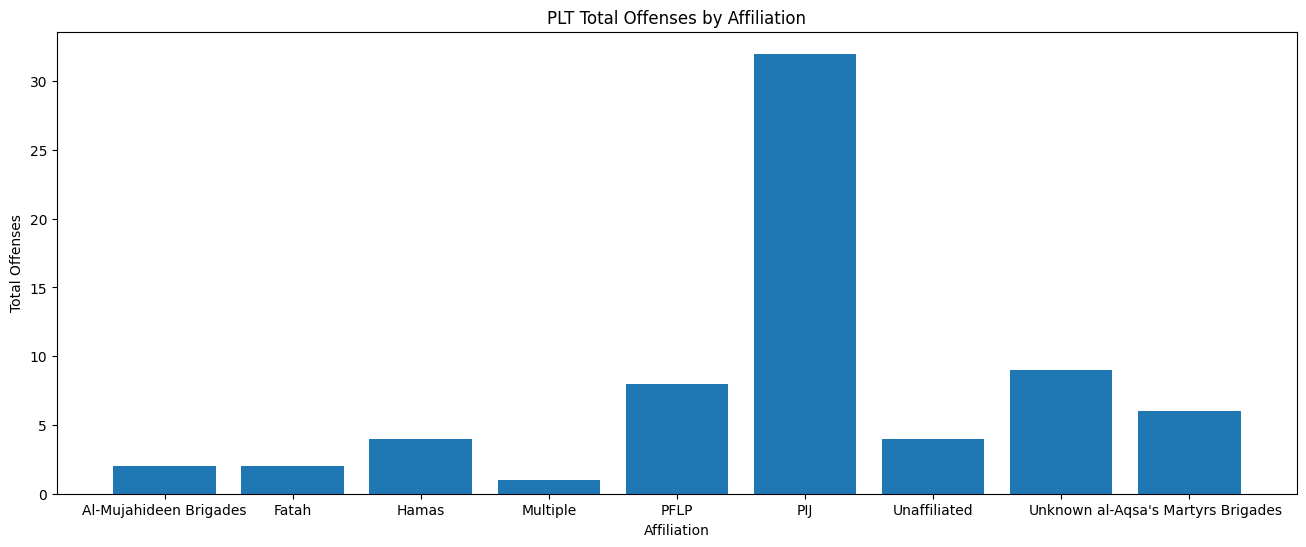

In [24]:
#matplotlib bar chart displaying total offenses committed by each terrorist organization
solution.pltbar()